## Практическое задание

  1. Постройте нейронную сеть(берем простую линейную сеть, которую разбирали на уроке: меняем число слоев, число нейронов , типы активации, тип оптимизатора)  на датасет from sklearn.datasets import load_boston. 
  2. Измените функцию потерь и метрику для этой задачи. Постройте 10-15 вариантов и сведите результаты их работы в таблицу  Опишите, какого результата вы добились от нейросети? Что помогло вам улучшить ее точность?

  3. Поработайте с документацией TensorFlow 2. Найти 2-3 полезные команды TensorFlow, не разобранные на уроке (полезные для Вас).

  1-2. (*)  Попробуйте обучить нейронную сеть на TensorFlow 2 на датасете imdb_reviews .Опишите, какого результата вы добились от нейросети? Что помогло вам улучшить ее точность?

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import tensorflow as tf

from sklearn.model_selection import train_test_split, ParameterGrid
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [2]:
AUTOTUNE = tf.data.AUTOTUNE

In [ ]:
results = pd.DataFrame(index=["MAE", "MSE", "RMSE", "R2"])

In [ ]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.boston_housing.load_data(test_split=0.2, seed=42)

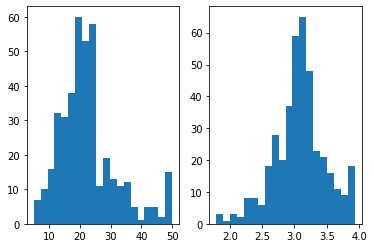

In [ ]:
plt.subplot(121)
plt.hist(y_train, bins=20)
plt.subplot(122)
plt.hist(np.log1p(y_train), bins=20)  # можно попробовать прологарифмировать таргет, но в данном случае совершенно не обязательно
plt.show()

In [ ]:
# adversarial validation
from lightgbm import LGBMClassifier
from sklearn.model_selection import cross_val_score, KFold

def check_split_equality(x_train, x_test, estimator=None, params=None):
    x_inspect = np.concatenate([x_train, x_test], axis=0)
    y_inspect = np.hstack((np.ones(x_train.shape[0]), np.zeros(x_test.shape[0])))

    if params is None:
        params = {'max_depth': 3,
                  'n_estimators': 500,
                  'verbose': -1,
                  'is_unbalance': True,
                  'learning_rate': 0.1,
                  'random_seed': 42,
        }
    if estimator is None:
        inspector = LGBMClassifier(**params).fit(x_inspect, y_inspect)
    else:
        inspector = estimator

    cv = cross_val_score(
                         estimator=inspector,
                         X=x_inspect,
                         y=y_inspect,
                         scoring="roc_auc",
                         cv=KFold(n_splits=10, shuffle=True, random_state=42)
    )
    print(f"CV-score: {round(np.mean(cv), 4)}")

In [ ]:
check_split_equality(x_train, x_test)  # не совсем прямо одинаковое распределение, но делать с этим ничего не будем

CV-score: 0.5196


In [ ]:
scaler = MinMaxScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [ ]:
param_grid = {
    "n_hideden_layers": [1, 2, ],
    "loss_function": ["mean_absolute_error", "mean_squared_error",],
    "batch_size": [8, 32,],
    "optimizer": ["adam", "sgd"]
}

params = ParameterGrid(param_grid)
print(f"We will inspect {len(list(params))} number of networks.")

We will inspect 16 number of networks.


In [ ]:
def plot_history(history, loss=""):
    plt.plot(history.history['loss'] ,label='train')
    plt.plot(history.history['val_loss'] ,label='valid')
    plt.legend()
    plt.xlabel('epoch')
    plt.ylabel('Loss')
    plt.title(f'{loss} over increasing epochs')
    plt.grid()
    plt.show()
    plt.pause(0.001)

def print_metrics(y_train_true, y_train_pred, y_test_true, y_test_pred):
    print(f"Train MSE: {mean_squared_error(y_train_true, y_train_pred):.4f}, validation MSE: {mean_squared_error(y_test_true, y_test_pred):.4f}")
    print(f"Train RMSE: {mean_squared_error(y_train_true, y_train_pred, squared=False):.4f}, validation RMSE: {mean_squared_error(y_test_true, y_test_pred, squared=False):.4f}")
    print(f"Train MAE: {mean_absolute_error(y_train_true, y_train_pred):.4f}, validation MAE: {mean_absolute_error(y_test_true, y_test_pred):.4f}")
    print(f"Train R2: {r2_score(y_train_true, y_train_pred):.4f}, validation R2: {r2_score(y_test_true, y_test_pred):.4f}\n")

Experiment 1 with params: {'batch_size': 8, 'loss_function': 'mean_absolute_error', 'n_hideden_layers': 1, 'optimizer': 'adam'}



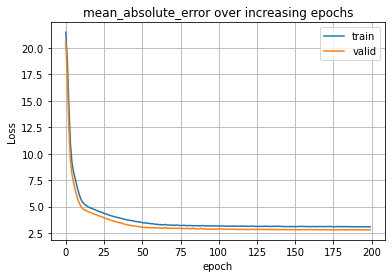

Train MSE: 24.1912, validation MSE: 23.1871
Train RMSE: 4.9185, validation RMSE: 4.8153
Train MAE: 3.0832, validation MAE: 2.8044
Train R2: 0.7243, validation R2: 0.6743

Experiment 2 with params: {'batch_size': 8, 'loss_function': 'mean_absolute_error', 'n_hideden_layers': 1, 'optimizer': 'sgd'}



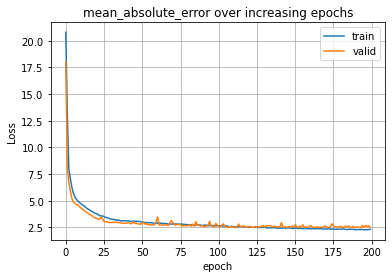

Train MSE: 15.2201, validation MSE: 18.0996
Train RMSE: 3.9013, validation RMSE: 4.2544
Train MAE: 2.2102, validation MAE: 2.4816
Train R2: 0.8266, validation R2: 0.7458

Experiment 3 with params: {'batch_size': 8, 'loss_function': 'mean_absolute_error', 'n_hideden_layers': 2, 'optimizer': 'adam'}



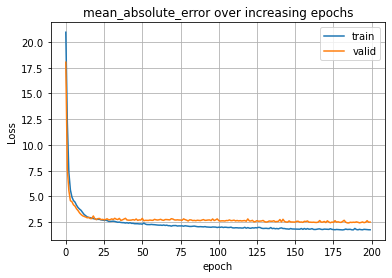

Train MSE: 9.5470, validation MSE: 15.8478
Train RMSE: 3.0898, validation RMSE: 3.9809
Train MAE: 1.7248, validation MAE: 2.5117
Train R2: 0.8912, validation R2: 0.7774

Experiment 4 with params: {'batch_size': 8, 'loss_function': 'mean_absolute_error', 'n_hideden_layers': 2, 'optimizer': 'sgd'}



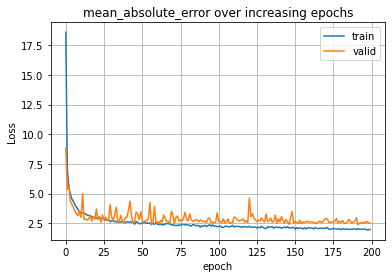

Train MSE: 10.5500, validation MSE: 13.0900
Train RMSE: 3.2481, validation RMSE: 3.6180
Train MAE: 2.0269, validation MAE: 2.5305
Train R2: 0.8798, validation R2: 0.8162

Experiment 5 with params: {'batch_size': 8, 'loss_function': 'mean_squared_error', 'n_hideden_layers': 1, 'optimizer': 'adam'}



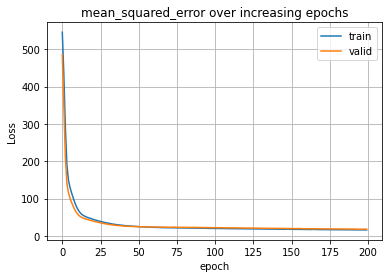

Train MSE: 16.0322, validation MSE: 18.2417
Train RMSE: 4.0040, validation RMSE: 4.2710
Train MAE: 2.8010, validation MAE: 2.7414
Train R2: 0.8173, validation R2: 0.7438

Experiment 6 with params: {'batch_size': 8, 'loss_function': 'mean_squared_error', 'n_hideden_layers': 1, 'optimizer': 'sgd'}



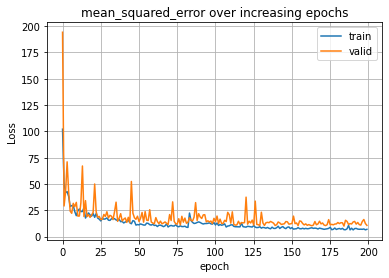

Train MSE: 7.6090, validation MSE: 10.6822
Train RMSE: 2.7584, validation RMSE: 3.2684
Train MAE: 2.1824, validation MAE: 2.5371
Train R2: 0.9133, validation R2: 0.8500

Experiment 7 with params: {'batch_size': 8, 'loss_function': 'mean_squared_error', 'n_hideden_layers': 2, 'optimizer': 'adam'}



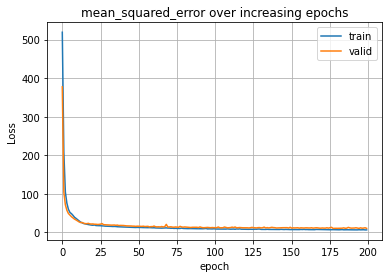

Train MSE: 5.9659, validation MSE: 10.3401
Train RMSE: 2.4425, validation RMSE: 3.2156
Train MAE: 1.7728, validation MAE: 2.2859
Train R2: 0.9320, validation R2: 0.8548

Experiment 8 with params: {'batch_size': 8, 'loss_function': 'mean_squared_error', 'n_hideden_layers': 2, 'optimizer': 'sgd'}



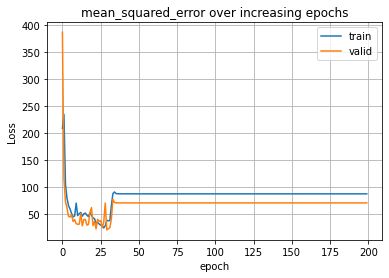

Train MSE: 87.7584, validation MSE: 71.2058
Train RMSE: 9.3679, validation RMSE: 8.4384
Train MAE: 6.8397, validation MAE: 5.9247
Train R2: -0.0001, validation R2: -0.0001

Experiment 9 with params: {'batch_size': 32, 'loss_function': 'mean_absolute_error', 'n_hideden_layers': 1, 'optimizer': 'adam'}



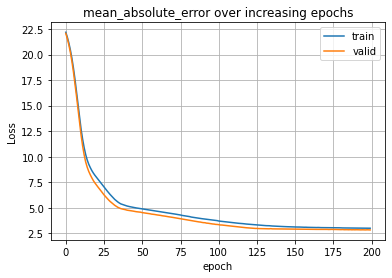

Train MSE: 22.6071, validation MSE: 22.4366
Train RMSE: 4.7547, validation RMSE: 4.7367
Train MAE: 2.9828, validation MAE: 2.8255
Train R2: 0.7424, validation R2: 0.6849

Experiment 10 with params: {'batch_size': 32, 'loss_function': 'mean_absolute_error', 'n_hideden_layers': 1, 'optimizer': 'sgd'}



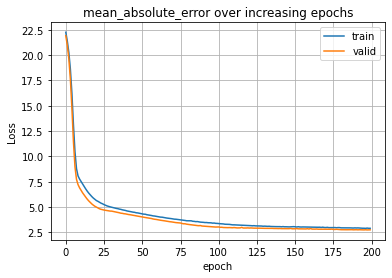

Train MSE: 21.8934, validation MSE: 22.0153
Train RMSE: 4.6790, validation RMSE: 4.6921
Train MAE: 2.9069, validation MAE: 2.7472
Train R2: 0.7505, validation R2: 0.6908

Experiment 11 with params: {'batch_size': 32, 'loss_function': 'mean_absolute_error', 'n_hideden_layers': 2, 'optimizer': 'adam'}



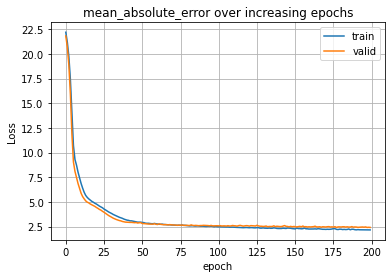

Train MSE: 13.1463, validation MSE: 14.8104
Train RMSE: 3.6258, validation RMSE: 3.8484
Train MAE: 2.1343, validation MAE: 2.4088
Train R2: 0.8502, validation R2: 0.7920

Experiment 12 with params: {'batch_size': 32, 'loss_function': 'mean_absolute_error', 'n_hideden_layers': 2, 'optimizer': 'sgd'}



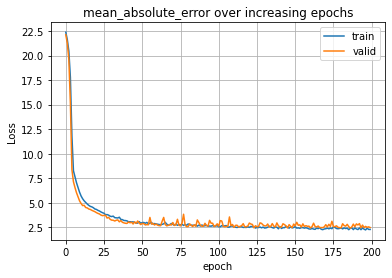

Train MSE: 14.2641, validation MSE: 16.6065
Train RMSE: 3.7768, validation RMSE: 4.0751
Train MAE: 2.1412, validation MAE: 2.4828
Train R2: 0.8375, validation R2: 0.7668

Experiment 13 with params: {'batch_size': 32, 'loss_function': 'mean_squared_error', 'n_hideden_layers': 1, 'optimizer': 'adam'}



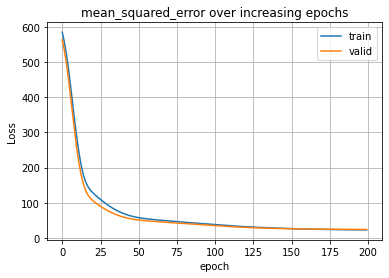

Train MSE: 22.4126, validation MSE: 23.7713
Train RMSE: 4.7342, validation RMSE: 4.8756
Train MAE: 3.3501, validation MAE: 3.1084
Train R2: 0.7446, validation R2: 0.6661

Experiment 14 with params: {'batch_size': 32, 'loss_function': 'mean_squared_error', 'n_hideden_layers': 1, 'optimizer': 'sgd'}



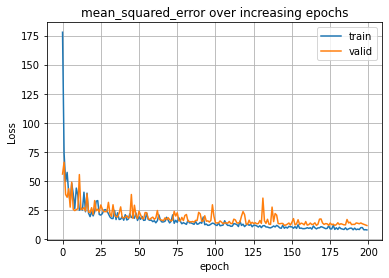

Train MSE: 7.1012, validation MSE: 11.5217
Train RMSE: 2.6648, validation RMSE: 3.3944
Train MAE: 1.8751, validation MAE: 2.4397
Train R2: 0.9191, validation R2: 0.8382

Experiment 15 with params: {'batch_size': 32, 'loss_function': 'mean_squared_error', 'n_hideden_layers': 2, 'optimizer': 'adam'}



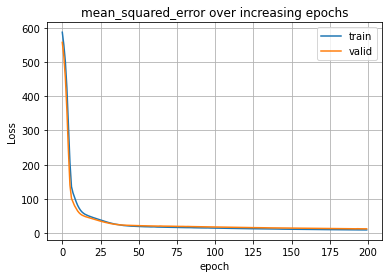

Train MSE: 9.1985, validation MSE: 12.5444
Train RMSE: 3.0329, validation RMSE: 3.5418
Train MAE: 2.1225, validation MAE: 2.3993
Train R2: 0.8952, validation R2: 0.8238

Experiment 16 with params: {'batch_size': 32, 'loss_function': 'mean_squared_error', 'n_hideden_layers': 2, 'optimizer': 'sgd'}



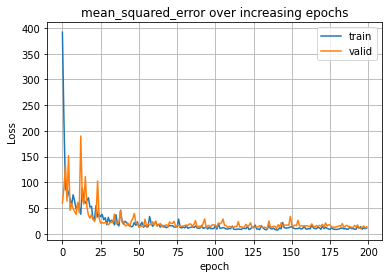

Train MSE: 9.5644, validation MSE: 13.3071
Train RMSE: 3.0926, validation RMSE: 3.6479
Train MAE: 2.2310, validation MAE: 2.4212
Train R2: 0.8910, validation R2: 0.8131



In [ ]:
# without regularization
for step, p in enumerate(list(params)):
    batch_size = p["batch_size"]
    loss = p["loss_function"]
    n_layers = p["n_hideden_layers"]
    optimizer = p["optimizer"]
    print(f"Experiment {step+1} with params: {p}\n")

    train_ds = tf.data.Dataset.from_tensor_slices((x_train_scaled, y_train)).shuffle(100).batch(batch_size).prefetch(AUTOTUNE)
    test_ds = tf.data.Dataset.from_tensor_slices((x_test_scaled, y_test)).batch(batch_size).prefetch(AUTOTUNE)

    layers = [tf.keras.layers.Input(shape=(x_train.shape[-1],))]
    k = 1
    for i in range(n_layers):
        if i > 0 and i % 2 == 0:
            k += 1
        layers += [tf.keras.layers.Dense(64 // k, activation="relu")]
    layers += [tf.keras.layers.Dense(1)]

    model = tf.keras.Sequential(layers)
    model.compile(optimizer=optimizer, loss=loss, metrics=["mae"])

    history = model.fit(train_ds, epochs=200, validation_data=test_ds, verbose=0)
    y_train_pred = model.predict(x_train_scaled, verbose=0)
    y_test_pred = model.predict(x_test_scaled, verbose=0)
    plot_history(history, loss=loss)
    print_metrics(y_train, y_train_pred, y_test, y_test_pred)

    results = pd.concat([results, pd.Series(data=[mean_absolute_error(y_test, y_test_pred),
                                                  mean_squared_error(y_test, y_test_pred),
                                                  mean_squared_error(y_test, y_test_pred, squared=False),
                                                  r2_score(y_test, y_test_pred)
                                                  ], index=["MAE", "MSE", "RMSE", "R2"], name=f"{step+1}")], axis=1)

In [ ]:
results

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
MAE,2.804441,2.481622,2.511679,2.530515,2.741412,2.537110,2.285853,5.924711,2.825492,2.747213,2.408806,2.482849,3.108419,2.439670,2.399298,2.421163
MSE,23.187122,18.099622,15.847845,13.090040,18.241740,10.682241,10.340125,71.205766,22.436556,22.015349,14.810368,16.606522,23.771311,11.521689,12.544378,13.307060
RMSE,4.815301,4.254365,3.980935,3.618016,4.271035,3.268370,3.215607,8.438351,4.736724,4.692052,3.848424,4.075110,4.875583,3.394361,3.541804,3.647884
R2,0.674347,0.745799,0.777424,0.816156,0.743803,0.849973,0.854778,-0.000053,0.684889,0.690804,0.791995,0.766769,0.666143,0.838183,0.823820,0.813108


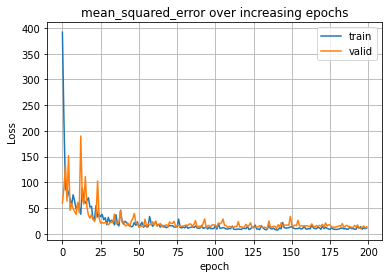

Train MSE: 4.2515, validation MSE: 9.7090
Train RMSE: 2.0619, validation RMSE: 3.1159
Train MAE: 1.4971, validation MAE: 2.1054
Train R2: 0.9516, validation R2: 0.8636



In [ ]:
train_ds = tf.data.Dataset.from_tensor_slices((x_train_scaled, y_train)).shuffle(404).batch(1).prefetch(AUTOTUNE)
test_ds = tf.data.Dataset.from_tensor_slices((x_test_scaled, y_test)).batch(1).prefetch(AUTOTUNE)

model = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation="relu", input_shape=(x_train_scaled.shape[1],)),
    tf.keras.layers.Dropout(0.1), 
    tf.keras.layers.Dense(64, activation="relu"),
    tf.keras.layers.Dropout(0.1),
    tf.keras.layers.Dense(1)
])

model.compile(optimizer="adam", loss="mean_squared_error", metrics=["mae"]) 
model.fit(train_ds, epochs=200, validation_data=test_ds, verbose=0)

y_train_pred = model.predict(x_train_scaled, verbose=0)
y_test_pred = model.predict(x_test_scaled, verbose=0)
plot_history(history, loss=loss)
print_metrics(y_train, y_train_pred, y_test, y_test_pred)

**Краткие выводы**

* batch_size - сильно повлиял на результат;
* количество слоев также полияло - 3 пока наилучший вариант;
* MSE - более стабильная функция;
* Adam с динамической скоростью обучения для каждого параметра (lr_scheduler при этом также возможен - ведь индивидуальный lr может быть (0, lr], верхнюю границу можно подрезать на более поздних этапах обучения) - лучший выбор здесь (пробовал также rmsprop);

**Полезные команды**

* методы (генераторы) из tf.data.Dataset: и к ним же cache / shuffle, batch, prefetch;
* функции из tf.linalg

In [3]:
!pip install -qq transformers

In [4]:
from transformers import DebertaTokenizer, TFDebertaModel  # берем базовый класс, т.к. хотим попробовать дополнительную архитектуру со сверточными слоями
import re
from nltk.corpus import stopwords
import nltk
import string
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [5]:
from IPython.display import clear_output
from google.colab import files
files.upload()
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!ls ~/.kaggle
!chmod 600 /root/.kaggle/kaggle.json
!kaggle datasets download -d lakshmi25npathi/imdb-dataset-of-50k-movie-reviews
!unzip imdb-dataset-of-50k-movie-reviews.zip
!rm imdb-dataset-of-50k-movie-reviews.zip
clear_output()

In [6]:
data = pd.read_csv('IMDB Dataset.csv')
data["sentiment"] = data["sentiment"].map({"positive": 0, "negative": 1})

In [ ]:
data.head(2)

,review,sentiment
0,One of the other reviewers has mentioned that ...,0
1,A wonderful little production. <br /><br />The...,0


In [7]:
stop = stopwords.words('english')

def preprocessor(text, use_stop=False):  # стоп-слова нужно не использовать для сохранения контекста для языковой модели, основанной на самовнимании
    text = re.sub('Subject: ', '', text)  # для базовой модели можно убрать
    text = re.sub('<[^>]*>', '', text)
    emoticons = re.findall('(?::|;|=)(?:-)?(?:\)|\(|D|P)', text.lower())
    text = re.sub('[\W]+', ' ', text.lower())
    text = re.sub(r'[^\w]', ' ', text)
    if use_stop:
        text = [w for w in text.split() if w not in stop]
    text = [re.sub(r"[^a-zA-Z0-9]+", '', k) for k in text]
    return re.sub(' +', ' ', ' '.join(text))

In [ ]:
# data["review"] = data["review"].apply(lambda x: preprocessor(x, use_stop=True))  # со стоп-словами остается очень много текста

In [ ]:
q1 = np.quantile(data["review"].str.len(), 0.25)
q3 = np.quantile(data["review"].str.len(), 0.75)
iqr = q3 - q1
q3 + 1.5 * iqr, q3, q1

(4551.0, 2472.0, 1086.0)

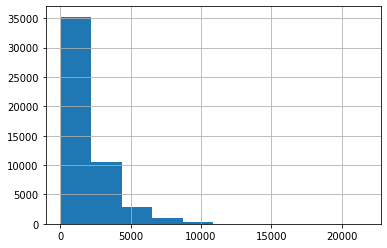

In [ ]:
data["review"].str.len().hist()

**Baseline**

In [8]:
max_features = 10000
sequence_length = 512

def custom_standardization(input_data):
    lowercase = tf.strings.lower(input_data)
    stripped_html = tf.strings.regex_replace(lowercase, '<br />', ' ')
    return tf.strings.regex_replace(stripped_html,
                                    '[%s]' % re.escape(string.punctuation),
                                    '')

vectorize_layer = tf.keras.layers.TextVectorization(
    standardize=custom_standardization,
    max_tokens=max_features,
    output_mode='int',
    output_sequence_length=sequence_length)

def vectorize_text(text, label):
    text = tf.expand_dims(text, -1)
    return vectorize_layer(text), label

In [9]:
x_train, x_test, y_train, y_test = train_test_split(data["review"].tolist(), data["sentiment"], test_size=0.2, random_state=42)

In [ ]:
# skip for baseline
for text in x_train:
    text = ' '.join([w for w in text.split() if w not in stop])

for text in x_test:
    text = ' '.join([w for w in text.split() if w not in stop])

In [10]:
train_ds = tf.data.Dataset.from_tensor_slices((x_train, y_train)).batch(32)
valid_ds = tf.data.Dataset.from_tensor_slices((x_test, y_test)).batch(32)

In [11]:
train_text = train_ds.map(lambda x, y: x)
vectorize_layer.adapt(train_text)

In [12]:
train_ds = train_ds.map(vectorize_text)
valid_ds = valid_ds.map(vectorize_text)

In [13]:
train_ds = train_ds.cache().prefetch(buffer_size=AUTOTUNE)
valid_ds = valid_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [ ]:
model = tf.keras.Sequential([
  tf.keras.layers.Embedding(max_features + 1, 16),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.GlobalAveragePooling1D(),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(1)])

model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_3 (Embedding)     (None, None, 16)          160016    
                                                                 
 dropout_6 (Dropout)         (None, None, 16)          0         
                                                                 
 global_average_pooling1d_1   (None, 16)               0         
 (GlobalAveragePooling1D)                                        
                                                                 
 dropout_7 (Dropout)         (None, 16)                0         
                                                                 
 dense_5 (Dense)             (None, 1)                 17        
                                                                 
Total params: 160,033
Trainable params: 160,033
Non-trainable params: 0
________________________________________________

In [ ]:
model = tf.keras.Sequential([
  tf.keras.layers.Embedding(max_features + 1, 16),
  tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(16)),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(16, activation='relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(1)])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, None, 16)          160016    
                                                                 
 bidirectional (Bidirectiona  (None, 32)               4224      
 l)                                                              
                                                                 
 dropout (Dropout)           (None, 32)                0         
                                                                 
 dense (Dense)               (None, 16)                528       
                                                                 
 dropout_1 (Dropout)         (None, 16)                0         
                                                                 
 dense_1 (Dense)             (None, 1)                 17        
                                                        

In [ ]:
model.compile(loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              optimizer='adam',
              metrics=tf.metrics.BinaryAccuracy(threshold=0.5))

callbacks = [
             tf.keras.callbacks.ReduceLROnPlateau(patience=2),
             tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=4, restore_best_weights=True),
            ]

In [ ]:
epochs = 20
history = model.fit(train_ds, validation_data=valid_ds, epochs=epochs, callbacks=callbacks)

Epoch 1/20
1250/1250 [==============================] - 9s 6ms/step - loss: 0.6449 - binary_accuracy: 0.7002 - val_loss: 0.5625 - val_binary_accuracy: 0.8085 - lr: 0.0010
Epoch 2/20
1250/1250 [==============================] - 5s 4ms/step - loss: 0.4890 - binary_accuracy: 0.8299 - val_loss: 0.4250 - val_binary_accuracy: 0.8571 - lr: 0.0010
Epoch 3/20
1250/1250 [==============================] - 5s 4ms/step - loss: 0.3851 - binary_accuracy: 0.8667 - val_loss: 0.3542 - val_binary_accuracy: 0.8734 - lr: 0.0010
Epoch 4/20
1250/1250 [==============================] - 5s 4ms/step - loss: 0.3302 - binary_accuracy: 0.8817 - val_loss: 0.3159 - val_binary_accuracy: 0.8828 - lr: 0.0010
Epoch 5/20
1250/1250 [==============================] - 5s 4ms/step - loss: 0.2955 - binary_accuracy: 0.8926 - val_loss: 0.2925 - val_binary_accuracy: 0.8877 - lr: 0.0010
Epoch 6/20
1250/1250 [==============================] - 5s 4ms/step - loss: 0.2725 - binary_accuracy: 0.9001 - val_loss: 0.2774 - val_binary_accu

In [ ]:
model.evaluate(valid_ds)  # baseline

313/313 [==============================] - 1s 2ms/step - loss: 0.2510 - binary_accuracy: 0.9019


[0.2510116398334503, 0.9018999934196472]

In [ ]:
model.evaluate(valid_ds)  # bidirectional LSTM

313/313 [==============================] - 4s 12ms/step - loss: 0.3034 - binary_accuracy: 0.8736


[0.3033536970615387, 0.8736000061035156]

In [ ]:
# build transformer model

def transformer_encoder(inputs, head_size, num_heads, ff_dim, dropout=0):
    # Attention and Normalization
    x = tf.keras.layers.MultiHeadAttention(
        key_dim=head_size, num_heads=num_heads, dropout=dropout
    )(inputs, inputs)
    x = tf.keras.layers.Dropout(dropout)(x)
    x = tf.keras.layers.LayerNormalization(epsilon=1e-6)(x)
    res = x + inputs

    # Feed Forward Part
    x = tf.keras.layers.Conv1D(filters=ff_dim, kernel_size=1, activation="relu")(res)
    x = tf.keras.layers.Dropout(dropout)(x)
    x = tf.keras.layers.Conv1D(filters=inputs.shape[-1], kernel_size=1)(x)
    x = tf.keras.layers.LayerNormalization(epsilon=1e-6)(x)
    return x + res

In [17]:
def transformer_encoder(inputs, head_size, num_heads, ff_dim, dropout=0):
    # Attention and Normalization
    x = tf.keras.layers.MultiHeadAttention(
        key_dim=head_size, num_heads=num_heads, dropout=dropout
    )(inputs, inputs)
    x = tf.keras.layers.Dropout(dropout)(x)
    x = tf.keras.layers.Add()([x, inputs])
    res = tf.keras.layers.LayerNormalization(epsilon=1e-6)(x)
    # res = tf.keras.layers.LeakyReLU()(res)

    # Convolutional Feed Forward Part
    x = tf.keras.layers.Conv1D(filters=ff_dim, kernel_size=1, activation="relu")(res)
    x = tf.keras.layers.Dropout(dropout)(x)
    x = tf.keras.layers.Conv1D(filters=inputs.shape[-1], kernel_size=1)(x)
    x = tf.keras.layers.Add()([x, res])
    x = tf.keras.layers.LayerNormalization(epsilon=1e-6)(x)
    return x

In [18]:
class SeqEmbedding(tf.keras.layers.Layer):
    def __init__(self, vocab_size, max_length, depth):
        super().__init__()
        self.pos_embedding = tf.keras.layers.Embedding(input_dim=max_length, output_dim=depth)

        self.token_embedding = tf.keras.layers.Embedding(
            input_dim=vocab_size,
            output_dim=depth,
            mask_zero=True)

        self.add = tf.keras.layers.Add()

    def call(self, seq):
        seq = self.token_embedding(seq) # (batch, seq, depth)

        x = tf.range(tf.shape(seq)[1])  # (seq)
        x = x[tf.newaxis, :]  # (1, seq)
        x = self.pos_embedding(x)  # (1, seq, depth)

        return self.add([seq,x])

In [19]:
def build_model(
    input_shape,
    head_size,
    num_heads,
    ff_dim,
    num_transformer_blocks,
    mlp_units,
    n_classes,
    emb_dim,
    dropout=0,
    mlp_dropout=0,
):
    inputs = tf.keras.Input(shape=input_shape)
    x = inputs
    # x = tf.keras.layers.Embedding(emb_dim, head_size)(x)  # casual embedding
    x = SeqEmbedding(emb_dim, sequence_length, head_size)(x)
    for _ in range(num_transformer_blocks):
        x = transformer_encoder(x, head_size, num_heads, ff_dim, dropout)
    x = tf.keras.layers.GlobalAveragePooling1D()(x)  # channels first as for transformer output without pos_emb: data_format="channels_first"
    for dim in mlp_units:
        x = tf.keras.layers.Dense(dim, activation="relu")(x)
        x = tf.keras.layers.Dropout(mlp_dropout)(x)
    outputs = tf.keras.layers.Dense(n_classes)(x)
    return tf.keras.Model(inputs, outputs)

In [20]:
model = build_model(input_shape=(sequence_length,), head_size=16, num_heads=2, ff_dim=16, num_transformer_blocks=1, mlp_units=[16], n_classes=1, emb_dim=max_features+1, dropout=0.4, mlp_dropout=0.5)
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 512)]        0           []                               
                                                                                                  
 seq_embedding (SeqEmbedding)   (None, 512, 16)      168208      ['input_1[0][0]']                
                                                                                                  
 multi_head_attention (MultiHea  (None, 512, 16)     2160        ['seq_embedding[0][0]',          
 dAttention)                                                      'seq_embedding[0][0]']          
                                                                                                  
 dropout (Dropout)              (None, 512, 16)      0           ['multi_head_attention[0][0]'

In [21]:
!pip install -qq tensorflow_addons
from tensorflow_addons.optimizers import AdamW

In [22]:
model.compile(loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              optimizer=AdamW(learning_rate=0.0001, weight_decay=0.0001),
              metrics=tf.metrics.BinaryAccuracy(threshold=0.5))

callbacks = [
             tf.keras.callbacks.ReduceLROnPlateau(patience=3),
             tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True),
            ]

epochs = 40
history = model.fit(train_ds, validation_data=valid_ds, epochs=epochs, callbacks=callbacks)

Epoch 1/40
1250/1250 [==============================] - 36s 26ms/step - loss: 0.6621 - binary_accuracy: 0.5210 - val_loss: 0.5986 - val_binary_accuracy: 0.5795 - lr: 1.0000e-04
Epoch 2/40
1250/1250 [==============================] - 23s 19ms/step - loss: 0.5331 - binary_accuracy: 0.7131 - val_loss: 0.4165 - val_binary_accuracy: 0.8520 - lr: 1.0000e-04
Epoch 3/40
1250/1250 [==============================] - 25s 20ms/step - loss: 0.3849 - binary_accuracy: 0.8432 - val_loss: 0.2993 - val_binary_accuracy: 0.8884 - lr: 1.0000e-04
Epoch 4/40
1250/1250 [==============================] - 24s 19ms/step - loss: 0.3156 - binary_accuracy: 0.8842 - val_loss: 0.2666 - val_binary_accuracy: 0.8956 - lr: 1.0000e-04
Epoch 5/40
1250/1250 [==============================] - 23s 19ms/step - loss: 0.2848 - binary_accuracy: 0.9049 - val_loss: 0.2603 - val_binary_accuracy: 0.8997 - lr: 1.0000e-04
Epoch 6/40
1250/1250 [==============================] - 23s 19ms/step - loss: 0.2660 - binary_accuracy: 0.9150 - va

**DeBERTa**

In [ ]:
tokenizer = DebertaTokenizer.from_pretrained("kamalkraj/deberta-base")
base = TFDebertaModel.from_pretrained("kamalkraj/deberta-base", num_labels=2)

All model checkpoint layers were used when initializing TFDebertaModel.

All the layers of TFDebertaModel were initialized from the model checkpoint at kamalkraj/deberta-base.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFDebertaModel for predictions without further training.


In [ ]:
def tokenize(sentences, max_length=512, padding='max_length'):  # по сути берем первые 510 токенов (+ [CLS], [SEP]), что в основном только часть текста, но как правило, такоцй текст уже отражает смысл
    return tokenizer(                                           # можно попробовать LongFormer для текстов длиной до 4096
        sentences,
        truncation=True,
        padding=padding,
        max_length=max_length,
        return_tensors="tf"
    )

In [ ]:
input_ids = tf.keras.layers.Input(shape=(512,), dtype=tf.int32, name='input_ids')  # названия соотвествуют ключам в словаре токенизатора (это нужно при передаче словаря в метод fit)
attention_mask = tf.keras.layers.Input((512,), dtype=tf.int32, name='attention_mask')  # маски для сокрытия паддинга (self-attention не обращает внимания на эти токены, т.к. их вес в softmax = -inf)

for layer in base.layers:
    layer.trainable = False

output = base([input_ids, attention_mask]).last_hidden_state[:, 0, :]  # получаем [CLS] токен для классификации, для других задач либо для применения сверточных слоев можно взять last_hidden_state

output = tf.keras.layers.Dropout(0.1)(output)  # регуляризация
output = tf.keras.layers.Dense(768)(output)  # активация после нормализации
output = tf.keras.layers.BatchNormalization()(output)
output = tf.keras.layers.Activation("relu")(output)

output = tf.keras.layers.Dense(768)(output)
output = tf.keras.layers.BatchNormalization()(output)
output = tf.keras.layers.Activation("relu")(output)

output = tf.keras.layers.Dense(1, 
                               kernel_regularizer=tf.keras.regularizers.l2(l2=0.001),
                               activation='sigmoid')(output)

model = tf.keras.Model(inputs=[input_ids, attention_mask], outputs=output)

model.compile(
    loss=tf.keras.losses.BinaryCrossentropy(from_logits=False),
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.00001),
    metrics=['accuracy']  # классы сбалансированы
)

In [ ]:
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_ids (InputLayer)         [(None, 512)]        0           []                               
                                                                                                  
 attention_mask (InputLayer)    [(None, 512)]        0           []                               
                                                                                                  
 tf_deberta_model_1 (TFDebertaM  TFBaseModelOutput(l  138601728  ['input_ids[0][0]',              
 odel)                          ast_hidden_state=(N               'attention_mask[0][0]']         
                                one, 512, 768),                                                   
                                 hidden_states=None                                         

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(data["review"].tolist(), data["sentiment"], test_size=0.2, random_state=42)

In [ ]:
train_ds = tf.data.Dataset.from_tensor_slices((dict(tokenize(x_train)), y_train.values)).batch(16).prefetch(AUTOTUNE)
valid_ds = tf.data.Dataset.from_tensor_slices((dict(tokenize(x_test)), y_test.values)).batch(16).prefetch(AUTOTUNE)

In [ ]:
def scheduler(epoch):
    learning_rate = 0.01
    if epoch == 0:
        return learning_rate * 0.05
    else:
        return learning_rate * (0.8**epoch)
# "разогрев"
callback_lr = tf.keras.callbacks.LearningRateScheduler(scheduler)

callbacks = [
             callback_lr,
             #tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True),
            ]

In [ ]:
history = model.fit(
                    train_ds,
                    epochs=3,
                    validation_data=valid_ds,
                    #callbacks=callbacks,
                    verbose=1
)  # не хватает лимита для завершения обучения

In [ ]:
from transformers import TFDebertaForSequenceClassification

In [ ]:
model = TFDebertaForSequenceClassification.from_pretrained("kamalkraj/deberta-base", num_labels=2)

All model checkpoint layers were used when initializing TFDebertaForSequenceClassification.

Some layers of TFDebertaForSequenceClassification were not initialized from the model checkpoint at kamalkraj/deberta-base and are newly initialized: ['classifier', 'cls_dropout', 'pooler']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [ ]:
train_ds = tf.data.Dataset.from_tensor_slices((dict(tokenize(x_train)), y_train.values)).batch(8).prefetch(AUTOTUNE)
valid_ds = tf.data.Dataset.from_tensor_slices((dict(tokenize(x_test)), y_test.values)).batch(8).prefetch(AUTOTUNE)

In [ ]:
model.compile(
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.00001),
    metrics=['sparse_categorical_accuracy']
)

In [ ]:
model.summary()

Model: "tf_deberta_for_sequence_classification"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 deberta (TFDebertaMainLayer  multiple                 138601728 
 )                                                               
                                                                 
 pooler (TFDebertaContextPoo  multiple                 590592    
 ler)                                                            
                                                                 
 cls_dropout (TFDebertaStabl  multiple                 0         
 eDropout)                                                       
                                                                 
 classifier (Dense)          multiple                  1538      
                                                                 
Total params: 139,193,858
Trainable params: 139,193,858
Non-trainable params: 0
______________

In [ ]:
history = model.fit(
                    train_ds,
                    epochs=3,
                    validation_data=valid_ds,
                    verbose=1
)  # не хватает памяти, может, уменьшить размер пакета